In [1]:
import torch
import numpy as np

In [2]:
N = 4
configuration = torch.rand((N**3,))*2*np.pi
configuration

tensor([6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00, 1.3697e+00, 3.1738e+00,
        5.4004e+00, 3.9772e+00, 2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00,
        5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00, 1.8808e+00, 1.2478e+00,
        1.3530e+00, 4.3770e+00, 5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00,
        4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00, 5.6867e+00, 8.0866e-01,
        2.0033e+00, 3.6220e+00, 2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02,
        2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00, 3.8821e+00, 3.9557e+00,
        4.4364e+00, 8.2157e-01, 1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00,
        5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00, 5.2117e-01, 7.5724e-01,
        5.4668e+00, 1.1236e+00, 4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00,
        4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00])

In [3]:
lattice = configuration.view(N,N,N)
lattice

tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00],
         [5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00],
         [5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01],
         [1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00]],

        [[5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00],
         [4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00]]])

In [4]:
torch.roll(lattice, shifts=1, dims=1)


tensor([[[5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00],
         [6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00]],

        [[5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00],
         [1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00]],

        [[1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00],
         [2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01]],

        [[4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00],
         [5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00]]])

In [19]:
def XYd2n3_BC(configuration):
    N = int(len(configuration) ** (1/3))+1 #for N>=3
    configuration = configuration%(2*torch.pi)
    copy_config = torch.zeros_like(configuration)
    copy_config[N-1::N] = configuration[::N]-configuration[N-1::N]
    copy_config[-N**2:] = configuration[:N**2]-configuration[-N**2:]
    for k in range(N):
        copy_config[(k+1)*N**2-N:(k+1)*N**2] = configuration[k*N**2:k*N**2+N]-configuration[(k+1)*N**2-N:(k+1)*N**2]
    return configuration + copy_config

In [22]:
XYd2n3_BC(configuration).view(N,N,N)


tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 6.2267e-01],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 1.3697e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 2.8005e+00],
         [6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 1.8808e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 5.8572e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 4.0331e+00],
         [1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 2.8571e+00],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 2.2430e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 3.8821e+00],
         [2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02]],

        [[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1444e-04, 2.2291e+00, 5.8529e+00],
         [5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00]]])

In [23]:
lattice

tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00],
         [5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00],
         [5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01],
         [1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00]],

        [[5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00],
         [4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00]]])

In [109]:
X = torch.tensor([1,2,3,4])

In [113]:
X[2:]

tensor([3, 4])

In [114]:
X[:2]

tensor([1, 2])

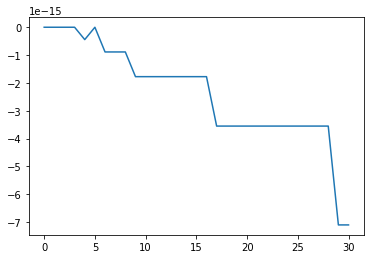

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,30, 31)

y = x**3
plt.plot(x, y**(1/3)-x)


In [10]:
(15**3+1)**(1/3)

15.001481335186401

In [1]:
15*15*15

3375

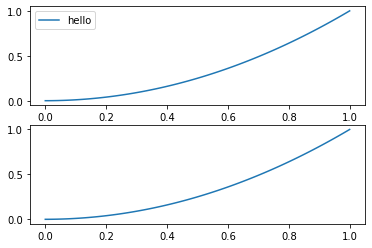

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2,1)

x = np.linspace(0,1,100)

ax1.plot(x, x**2, label='hello')
ax2.plot(x, x**2, label='hello')

ax1.legend()



In [17]:
import torch

def U(configuration, energy_parameters):
    x, y = configuration[0], configuration[1]
    a, L = energy_parameters

    N = configuration.shape[1]
    total_W = 0    
    for k in range(1, N):
        deltax_sqrd = (x - torch.roll(x, shifts=k))**2 #twice too much
        deltay_sqrd = (y - torch.roll(y, shifts=k))**2 #twice too much
        r_sqrd = deltax_sqrd+deltay_sqrd
        sum_W = -torch.sum(torch.exp(-r_sqrd/(2*a**2)))/2#removes the duplicates
        total_W += sum_W
    return 1/N * total_W

In [28]:
def U(configuration, energy_parameters):
    x, y = configuration[0], configuration[1]
    a, L = energy_parameters

    N = configuration.shape[1]

    # Creating tensors of shifted indices
    k_values = torch.arange(1, N)
    rolled_x = torch.stack([torch.roll(x, shifts=int(k)) for k in k_values])
    rolled_y = torch.stack([torch.roll(y, shifts=int(k)) for k in k_values])

    # Calculating squared differences
    deltax_sqrd = (x.unsqueeze(0) - rolled_x) ** 2
    deltay_sqrd = (y.unsqueeze(0) - rolled_y) ** 2
    r_sqrd = deltax_sqrd + deltay_sqrd

    # Computing W
    sum_W = -torch.sum(torch.exp(-r_sqrd / (2 * a ** 2)), dim=1) / 2
    total_W = torch.sum(sum_W)

    return 1 / N * total_W

In [27]:
import torch

def U(configuration, energy_parameters):
    a, L = energy_parameters
    N = configuration.shape[0] // 2
    shifts = torch.arange(2, 2 * N, 2).unsqueeze(1) # Create a tensor of shifts
    shifted_configs = torch.stack([torch.roll(configuration, shifts=int(s), dims=0) for s in shifts[:,0]], dim=0)

    deltar = (configuration - shifted_configs)**2
    r_sqrd = deltar.view(N-1, -1, 2).sum(dim=2)
    sum_W = -torch.sum(torch.exp(-r_sqrd / (2 * a**2)), dim=1) / 2
    total_W = torch.sum(sum_W)

    return 1/N * total_W


In [43]:
import torch

def U(configuration, energy_parameters):
    a, L = energy_parameters
    N = configuration.shape[0] // 2
    shifts = torch.arange(2, 2 * N, 2) # Create a tensor of shifts
    shifted_configs = torch.stack([torch.roll(configuration, shifts=int(s), dims=0) for s in shifts], dim=0)
    #print(shifted_configs)
    deltaxy_sqrd = (configuration - shifted_configs)**2
    r_sqrd = deltaxy_sqrd.view(N-1, -1, 2).sum(dim=2)

    sum_W = -torch.sum(torch.sum(torch.exp(-r_sqrd / (2 * a**2)), dim=1)) / 2
    return 1/N * sum_W

configuration = torch.tensor([10,10,-10,-10,0,0])
a = 1
L = 1
energy_parameters = [a, L]

In [44]:
U(configuration, energy_parameters)

tensor(-2.5223e-44)

In [80]:



# Example usage
data_dim = 2
low = 0   # Lower bound for each dimension
high = 1  # Upper bound for each dimension
uniform_dist = MultivariateUniform(low, high, data_dim)
samples = uniform_dist.sample()  # Generate 10 samples

print(uniform_dist.log_prob(torch.tensor([0.3,0.1])))
print(samples)

tensor(0.)
tensor([0.1831, 0.0879])


tensor([0.])

In [59]:
MultivariateUniform(3).sample()

TypeError: __init__() missing 2 required positional arguments: 'high' and 'data_dim'

In [1]:
import torch
torch.randint(N)

NameError: name 'N' is not defined

In [2]:
torch.randn(10)

tensor([-0.7847, -0.7329,  0.5805, -0.3636,  0.1568, -0.3523, -0.4024,  1.2379,
         0.0700,  0.8632])

In [30]:
torch.randint(0,10, (1,)).numpy()[0]

7

In [34]:
torch.randn(1)*2*torch.pi

tensor([1.0058])